In [1]:
import pandas as pd
import glob
import os
from bs4 import BeautifulSoup as b
from pyproj import Proj 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import pytess
from shapely.geometry import Polygon
from matplotlib.lines import Line2D
from matplotlib.artist import Artist
from matplotlib.mlab import dist_point_to_segment
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import shapefile
import glob

ImportError: DLL load failed: The specified module could not be found.

In [24]:
 turtle= pd.read_csv("C:/Users/BEA200/Desktop/turtle/python/table/output.csv")

c:\users\bea200\appdata\local\continuum\miniconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


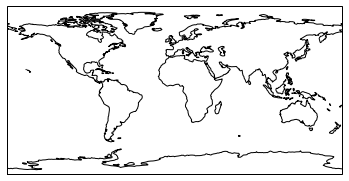

In [25]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

In [57]:
#class cartopy.io.shapereader.Reader("C:/Users/BEA200/Desktop/turtle/qgis/shapefile/habitat-marine_nin_20050608_ll_gda94.shp")

In [56]:
#reader = shpreader.Reader("C:/Users/BEA200/Desktop/turtle/qgis/shapefile/habitat-marine_nin_20050608_ll_gda94.shp")

Fiona is a shapefile tool but doesn't work

In [55]:
#import fiona
#shape = fiona.open("C:/Users/BEA200/Desktop/turtle/qgis/shapefile/habitat-marine_nin_20050608_ll_gda94.shp")
#print (shape.schema)

In [54]:
shape = shapefile.Reader("C:/Users/BEA200/Desktop/turtle/qgis/shapefile/all/habitat-marine_nin_20050608_ll_gda94.shp")
print(shape)

shapefile Reader
    485 shapes (type 'POLYGON')
    485 records (3 fields)


In [53]:
#first feature of the shapefile
feature = shape.shapeRecords()[0]
first = feature.shape.__geo_interface__  
print (first ("type:LineString", 'coordinates: ((0.0, 0.0), (25.0, 10.0), (50.0, 50.0))'))

TypeError: 'dict' object is not callable

In [67]:
#iles = glob.glob("C:/Users/BEA200/Desktop/turtle/qgis/shapefile/all/*.shp")
#en(files)

# = shapefile.Writer()
#or f in files:
  # = shapefile.Reader(f)
  #._shapes.extend(r.shapes())
  #.records.extend(r.records())
#.fields = list(r.fields)
#.save("merged")

OSError: [Errno 22] Invalid argument: 'C:/Users/BEA200/Desktop/turtle/qgis/shapefile/all/*.shp'

In [85]:
import os

class MergeSHPfiles (object):

    # A function which controls the rest of the script
    def run(self):
        # Define the input directory
        filePath = 'C:/Users/BEA200/Desktop/turtle/qgis/shapefile/all/'
        # Define the output file
        newSHPfile = 'C:/Users/BEA200/Desktop/turtle/qgis/shapefile/all/Merged_shapefile.shp'

# The start of the code
if __name__ == '__main__':
    # Make an instance of the class
    obj = MergeSHPfiles()
    # Call the function run()
    obj.run()

In [86]:
# A function which controls the rest of the script
def run(self):
    # Define the input directory
    filePath = 'C:/Users/BEA200/Desktop/turtle/qgis/shapefile/all/'
    # Define the output file
    newSHPfile = 'C:/Users/BEA200/Desktop/turtle/qgis/shapefile/all/Merged_shapefile.shp'

    # Check input file path exists and is a directory
    if not os.path.exists(filePath):
        print ('Filepath does not exist')
    elif not os.path.isdir(filePath):
        print ('Filepath is not a directory!')
    else:
        # Merge the shapefiles within the filePath
        self.mergeSHPfiles(filePath, newSHPfile)

In [71]:
# A function to control the merging of shapefiles
def mergeSHPfiles(self, filePath, newSHPfile):

SyntaxError: unexpected EOF while parsing (<ipython-input-71-6b50300fd9b1>, line 1)

In [77]:
# A function to test the file extension of a file
def checkFileExtension(self, filename, extension):
# Boolean variable to be returned by the function
    foundExtension = False;
# Split the filename into two parts (name + ext)
filenamesplit = os.path.splitext(filename)
# Get the file extension into a varaiable
fileExtension = filenamesplit[1].strip()
# Decide whether extensions are equal
if(fileExtension == extension):
    foundExtension = True
# Return result
return foundExtension
# A function which iterates through the directory and checks file extensions
def findFilesExt(self, directory, extension):
    # Define a list to store output list of files
    fileList = list(
        # check whether the current directory exits
        if(os.path.exists(directory)):
            # check whether the given directory is a directory
            if os.path.isdir(directory):
                # list all the files within the directory
                dirFileList = os.listdir(directory)
                # Loop through the individual files within the directory
                for filename in dirFileList:
                    # Check whether file is directory or file
                    if(os.path.isdir(os.path.join(directory,filename))):
                        print os.path.join(directory,filename) + \
                        ' is a directory and therefore ignored!'
                    elif(os.path.isfile(os.path.join(directory,filename))):
                        if(self.checkFileExtension(filename, extension)):
                            fileList.append(os.path.join(directory,filename))
                        else:
                            print filename + ' is NOT a file or directory!'
            else:
                print directory + ' is not a directory!'
        else:
            print directory + ' does not exist!')
# Return the list of files
return fileList

SyntaxError: invalid syntax (<ipython-input-77-638582513f74>, line 19)

In [87]:
# A function to control the merging of shapefiles
def mergeSHPfiles(self, filePath, newSHPfile):
    # Get the list of files within the directory
    # provided with the extension .shp
    fileList = self.findFilesExt(filePath, '.shp')
    # Iterate through the files.
    for file in fileList:
        print (file)

In [88]:
# A function to control the merging of shapefiles
def mergeSHPfiles(self, filePath, newSHPfile):
    # Get the list of files within the directory
    # provided with the extension .shp
    fileList = self.findFilesExt(filePath, '.shp')
    # Variable used to identify the first file
    first = True
    # A string for the command to be built
    command = ''
    # Iterate through the files.
    for file in fileList:
        if first:
            # If the first file make a copy to create the output file
            command = 'ogr2ogr ' + newSHPfile + ' ' + file
            first = False
        else:
            # Otherwise append the current shapefile to the output file
            command = 'ogr2ogr -update -append ' + newSHPfile + ' '  + \
            file + ' -nln ' + \
            self.removeSHPExtension(self.removeFilePathWINS(newSHPfile))
        # Execute the current command
        os.system(command)

In [89]:
# A function to remove a .shp extension from a file name
def removeSHPExtension(self, name):
    # The output file name
    outName = name
    # Find how many '.shp' strings are in the current file
    # name
    count = name.find('.shp', 0, len(name))
    # If there are no instances of .shp then -1 will be returned
    if not count == -1:
        # Replace all instances of .shp with empty string.
        outName = name.replace('.shp', '', name.count('.shp'))
    # Return output file name without .shp
    return outName

# A function to remove the file path a file 
# (in this case a windows file path)
def removeFilePathWINS(self, name):
    # Remove white space (i.e., spaces, tabs)
    name = name.strip()
    # Count the number of slashs 
    # A double slash is required because \ is a 
    # string escape charater.
    count = name.count('/')
    # Split string into a list where slashs occurs
    nameSegments = name.split('/', count)
    # Return the last item in the list
    return nameSegments[count]

In [90]:
newSHPfile

NameError: name 'newSHPfile' is not defined

In [91]:
outName


NameError: name 'outName' is not defined